In [112]:
# Zona de librerías:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

$\verb|Modelo FitzHugh-Nagumo|$: Este modelo describe el potencial de acción $u(x, t)$ y la variable de recuperación $\omega(x, t)$ a lo largo de la neurona. El sistema de ecuaciones diferenciales está dado por:

$$\frac{\partial u}{\partial t} = D\frac{\partial^{2} u}{\partial x^{2}} - u(u - a)(1 - u) + \omega$$

$$\frac{\partial \omega}{\partial t} = \varepsilon(u - b\omega)$$

Donde $D = 0.01$ es el coediciente de difusión de los iones y $a = 0.2$, $b = 0.3$, $\varepsilon = 0.03$ son constantes que afectan el proceso de difusión y de recuperación de la neurona. Utilice una discretización temporal $0 \leq t \leq 10$ con $N_{t} = 1000$ y $0 \leq x \leq 1$ con $N_{x} = 50$.

**(a).** Asegurese que el parámetro de difsusión sea $\lambda < 1/2$.

Para la definición del parámetro $\lambda$ hay que realizar la discretización de la ecuación. El caso más sencillo es notar que la discretización del factor de recuperación $\omega$:

$$\frac{\omega^{l + 1}_{i} - \omega^{l}_{i}}{\Delta{t}} = \varepsilon(u^{l}_{i} - b\omega^{l}_{i}) \quad \Rightarrow \quad \omega^{l + 1}_{i} = \varepsilon\Delta{t} \cdot (u^{l}_{i} - b\omega^{l}_{i}) + \omega^{l}_{i}$$

Por otro lado, en el caso de la función potencial de acción:

$$\frac{u^{l + 1}_{i} - u^{l}_{i}}{\Delta{t}} = D\frac{u^{l}_{i + 1} - 2u^{l}_{i} + u^{l}_{i - 1}}{2(\Delta{x})^{2}} - u^{l}_{i}(u^{l}_{i} - a)(1 - u^{l}_{i}) + \omega_{i}^{l}$$

$$u^{l + 1}_{i} = \frac{D\Delta{t}}{2(\Delta{x})^{2}} \cdot (u^{l}_{i + 1} -2u^{l}_{i} + u^{l}_{i - 1}) + \Delta{t} \cdot \left[\omega_{i}^{l} - u^{l}_{i}(u^{l}_{i} - a)(1 - u^{l}_{i})\right] + u^{l}_{i}$$

donde se tomará como $\lambda = D\Delta{t}/(\Delta{x})^{2}$.

In [113]:
Nt = 1000
Nx = 50
x = np.linspace(0, 1, Nx)
t = np.linspace(0, 10, Nt)
dx = x[1] - x[0]
dt = t[1] - t[0]

In [114]:
D = 0.01
a = 0.2
b = 0.3
e = 0.03

In [115]:
lambda_ = (D*dt)/(2*(dx**2))
print("El valor del factor lambda es de {}, ciertamente menor a 1/2.".format(round(lambda_, 2)))

El valor del factor lambda es de 0.12, ciertamente menor a 1/2.


In [116]:
def Action_Potential():
    u = np.zeros((Nt, Nx))
    u[0] = np.random.uniform(0, 0.3, Nx)
    u[:,0] = 0.1
    u[:,-1] = 0.2
    return u

def Backup():
    u = np.zeros((Nt, Nx))
    return u

V = Action_Potential()
W = Backup()

In [117]:
def Evolution(u, w):
    for l in tqdm(range(1, Nt)):
        for i in range(1, Nx - 1):
            w[l, i] = e*dt*(u[l - 1, i] - b*w[l - 1, i]) + w[l - 1, i]
            
            u[l, i] = lambda_*(u[l - 1, i + 1] - 2*u[l - 1, i] + u[l - 1, i - 1]) + (w[l - 1, i] - u[l - 1, i]*(u[l - 1, i] - a)*(1 - u[l - 1, i]))*dt + u[l - 1, i]
    return u, w

In [118]:
u, w = Evolution(V, W)

100%|██████████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3462.07it/s]


<IPython.core.display.Javascript object>


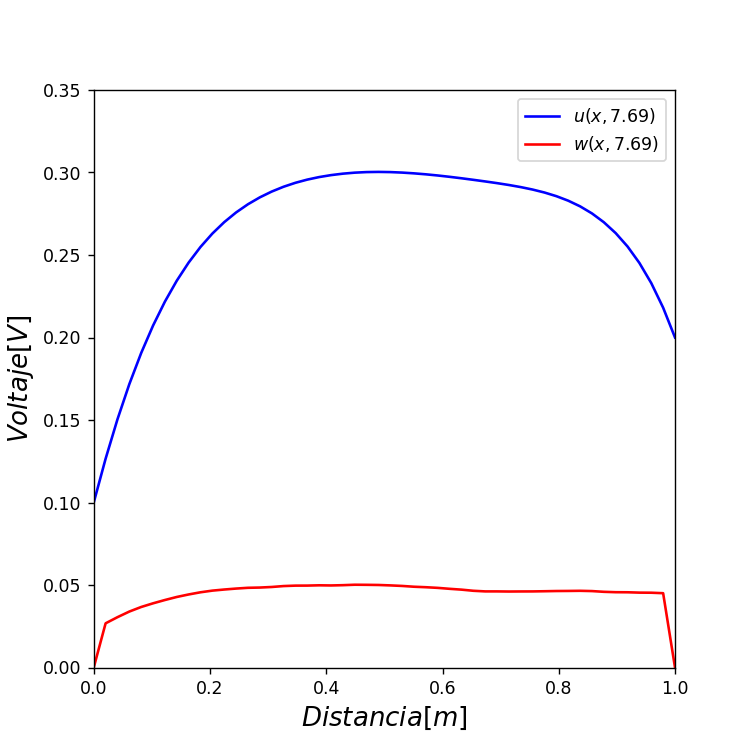

In [119]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
scale = 10

def init():
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,0.35)
    ax.set_xlabel(r'$Distancia [m]$', fontsize=15)
    ax.set_ylabel(r'$Voltaje [V]$', fontsize=15)    
    
def Update(i):
    ax.clear()
    init()
    ax.plot(x,u[i,:] ,color='b', label=r'$u(x,%.2f)$' %(t[i]))
    ax.plot(x, w[i,:], color = "r", label = r"$w(x,%.2f)$"%(t[i]))
    ax.legend(loc=0)
    
Animation = anim.FuncAnimation(fig, Update, frames=len(t), init_func=init)

In [120]:
Writer = anim.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Rikka Orimoto') )
# Animation.save('Neurona.mp4', writer=writer)

In [135]:
listed = []
for l in range(0, Nt):
    for i in range(0, Nx):
        if u[l, i] > 0.3:
            listed.append((t[l], x[i]))
        if len(listed) == 1:
            break    
timed = listed[0][0]
position = listed[0][1]

In [137]:
print("El primer momento en el que se rompe la barrera de porencial de activación de la neurona es para el tiempo {} y la posición {}.".format(round(timed, 2), round(position, 2)))

El primer momento en el que se rompe la barrera de porencial de activación de la neurona es para el tiempo 7.68 y la posición 0.49.
